# SAYT SOMETHING HERE
Looking at the occupation of Legal Professions: Lawyers, Juges, Magistrates, and other judicial positions (occ2012 = 2100)

https://osf.io/uqe8z = shows what variables mean

### Importing Libraries

In [52]:
import pandas as pd
import numpy as np
import warnings
from plotnine import *
warnings.filterwarnings("ignore")

### Reading Data & Exploratory Data Analysis

In [2]:
#reading file. morg2014.csv was too large- had to turn into zip file
file = pd.read_csv('ezyzip.zip')

In [3]:
#see data
file.shape

(317056, 96)

In [11]:
#Legal Professions like lawyers, judges, magistrates, and other judicial positions
#at start: 1,666 observations
law = file.loc[file['occ2012'] == 2100].reset_index(drop=True)
law.head()

,hhid,intmonth,hurespli,minsamp,hrlonglk,hrsample,hrhhid2,serial,hhnum,state,...,ym_file,ym,ch02,ch35,ch613,ch1417,ch05,ihigrdc,docc00,dind02
0,960021970039060,January,1.0,MIS 8,MIS 2-4 Or MIS 6-8 (link To,9100,91001,1,1,63,...,648,633,0,0,0,0,0,18.0,Legal occupations,Professional and Technical services
1,235004820400137,January,1.0,MIS 8,MIS 2-4 Or MIS 6-8 (link To,9100,91001,1,1,86,...,648,633,0,0,0,0,0,18.0,Legal occupations,Public Administration
2,985879730586005,January,3.0,MIS 8,MIS 2-4 Or MIS 6-8 (link To,9100,91001,1,1,71,...,648,633,0,0,0,1,0,18.0,Legal occupations,Professional and Technical services
3,94927107035608,January,2.0,MIS 4,MIS 2-4 Or MIS 6-8 (link To,9200,92001,1,1,93,...,648,645,0,0,1,0,0,18.0,Legal occupations,Professional and Technical services
4,97977400095618,January,1.0,MIS 4,MIS 2-4 Or MIS 6-8 (link To,9200,92001,1,1,93,...,648,645,0,0,0,1,0,18.0,Legal occupations,Professional and Technical services


In [ ]:
###CORINNE'S PLAN
# y = earnings per hour ('earnperhr')
    #this means... earnwke (weekly earnings)/uhourse
# x = age(int), sex(int), uhourse (usual work hours)(int), grade92 (highest educational grade completed)(int)
# Model 1: age, sex
# Model 2: age, sex, uhourse, grade92
# Model 3: age, sex, uhourse, grade92, state, race, prcitshp,
# Model 4: age, sex, uhourse, grade92, state, race, prcitshp, marital, ownchild

## have to turn sex and grade92 into dummy variables!!!

#could do 'state' as a variable, but would have to create dummy variables... (str)
#could do 'race' as a variable, but would have to create dummy variables... (int)
#could do 'prcitshp' (citizenship status) as a variable, but would have to create dummy variable...(str)
#could do 'marital' as variable...dummy variables would be 1,2,3 = 'married', 4,5,6,7 = 'single'(int)
#could do 'ownchild' as variable = shows number of children less than 18 in the primary family(int)

#deleting ethnic category because only 68/1,666 were not null!

In [20]:
#creation of outcome variable (y)
law['earnperhr'] = law['earnwke']/law['uhourse']
law['earnperhr'][:5]

0    28.84600
1    34.61525
2         NaN
3         NaN
4    46.14000
Name: earnperhr, dtype: float64

In [87]:
#checking for null values:

#age: no missing values
law.age.isnull().value_counts()

#sex: no missing values
law.sex.isnull().value_counts()

#uhourse: 189 null. using mode to impute
uhourse_mode_value = law.uhourse.mode()[0]
law.uhourse.fillna(value=uhourse_mode_value, inplace = True)
law.uhourse.isnull().value_counts()
#no missing values

#grade92: no missing values
law.grade92.isnull().value_counts()

#earnwke: 
law.earnwke.isnull().value_counts()
#471 null. CHANGEEEeeeeeeeeee (impute using mean perhaps)

#state: no missing values
law.state.isnull().value_counts()
#will have to change because has both int and str. change just to int

#race: no missing values
law.race.isnull().value_counts()

#prcitshp: no missing values
law.prcitshp.isnull().value_counts()
#change to be int as it is currently str

#marital: no missing values
law.marital.isnull().value_counts()
#will create 'married' and 'single' categories (separate variables)

#ownchild: no missing values
law.ownchild.isnull().value_counts()

# #uhourse:
# law.uhourse.isnull().value_counts()
law.uhourse.fillna(value=uhourse_mode_value, inplace = True)
# #189 null. using mode to impute 


uhourse
False    1666
Name: count, dtype: int64

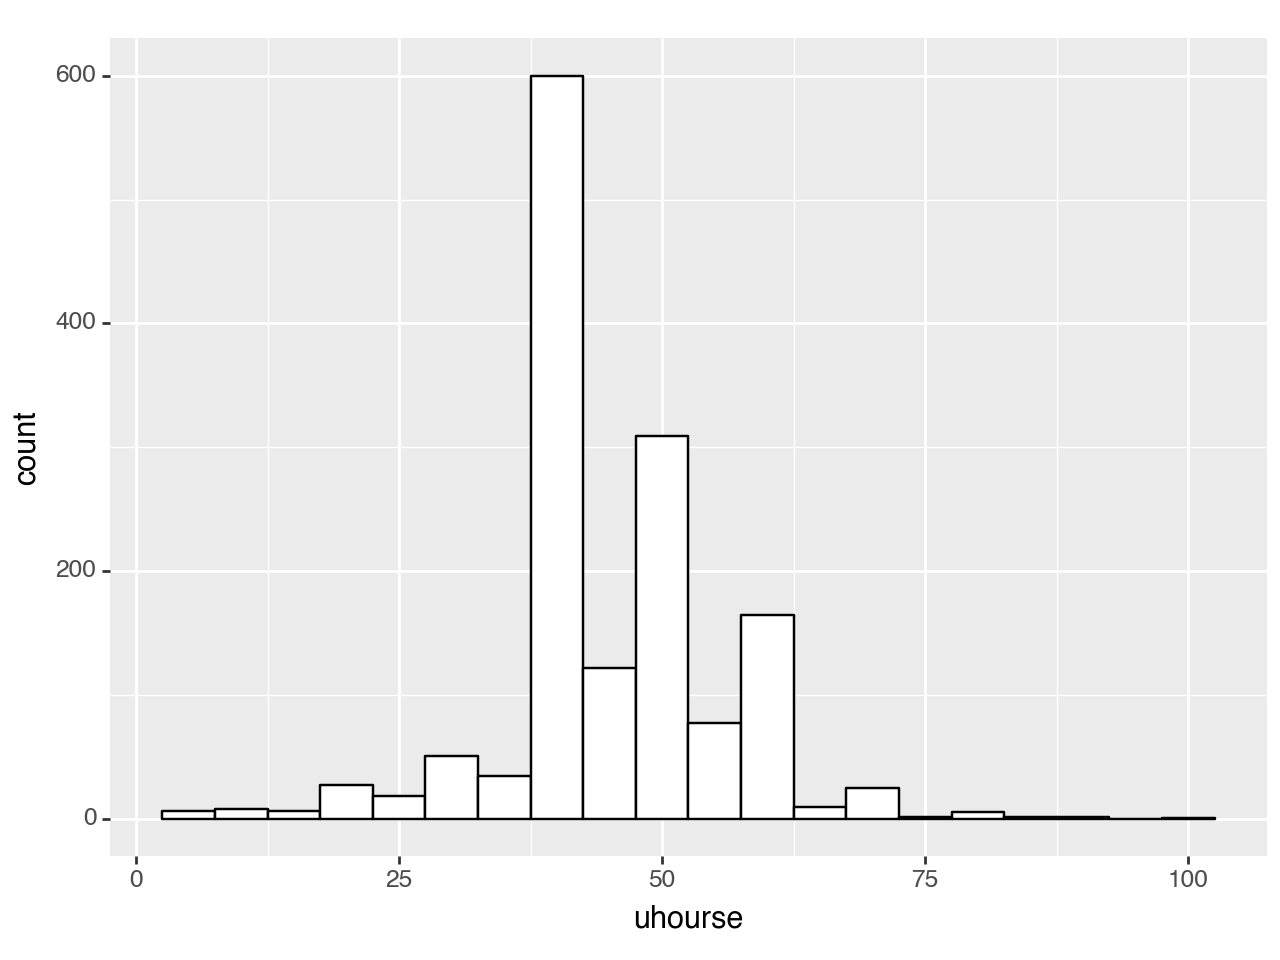

<Figure Size: (640 x 480)>

In [71]:
#checking distribution of 'uhourse' to see if imputation using mode or mean is better. not normally distributed,
#therefore, will use mode to impute
(ggplot(law, aes(x='uhourse')) +
    geom_histogram(binwidth= 5, colour="black", fill="white"))

In [51]:
####CORINNE- this is where you left off bb!!! 

count    1477.000000
mean       45.091401
std        10.861117
min         3.000000
25%        40.000000
50%        40.000000
75%        50.000000
max        99.000000
Name: uhourse, dtype: float64

In [93]:
#checking for null values
#below 3 (age, sex, grade92) have no missing values
pharm.age.isnull().value_counts()
pharm.sex.isnull().value_counts()
pharm.grade92.isnull().value_counts()

#uhourse and earnwke have missing values
pharm.uhourse.isnull().value_counts()
pharm.earnwke.isnull().value_counts()

#fixing uhourse and earnwke missing values
pharm.loc[pharm['uhourse'].isnull()].uhourse
pharm['uhourse'].fillna(0, inplace = True)
pharm.loc[pharm['earnwke'].isnull()].earnwke
pharm['earnwke'].fillna(0, inplace = True)

#creating (y) variable for earnings per hour as 'earnperhour'
pharm['earnperhour'] = pharm['earnwke']/pharm['uhourse']
pharm['earnperhour']

#creating dummy variable for sex
pharm['female'] = (pharm["sex"] == 2)
pharm['female'] = pharm['female'].astype(int)

#creating dummy variable for grade92
pharm['grade92'].min() #39, high school grad, diploma, or GED
pharm['grade92'].max() #46, doctorate degree
pharm['grade92'].mean() #about 44, master's degree
pharm['grade92'].describe() #in order to categorize education levels. 25% less than 43 (bachelor's) so that can be the highest threshold for the ed-low category
pharm['ed_low'] = ((pharm['grade92'] >= 39) & (pharm['grade92'] <= 43)).astype(int) #high school-bachelor's degree
pharm['ed_high'] = ((pharm['grade92'] >= 44) & (pharm['grade92'] <= 46)).astype(int) #master's-doctorate

In [ ]:
#reg1 = smf.ols(formula="w~female", data=data).fit()

In [ ]:
# y = earnings per hour 
    #this means... earnwke (weekly earnings)/uhourse
# x = age, sex, uhourse (usual work hours), grade92 (highest educational grade completed)
# Model 1: age
# Model 2: age, sex
# Model 3: age, sex, uhourse
# Model 4: age, sex, uhourse, grade92

## have to turn sex and grade92 into dummy variables!!!